[View in Colaboratory](https://colab.research.google.com/github/gops75/dLclass/blob/master/s4/inkersDL_p1r2_1stDNN.ipynb)

In [0]:
!pip install keras

In [16]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


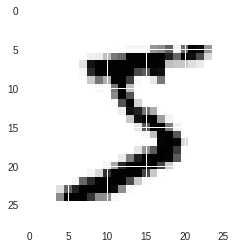

In [19]:
print(X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [20]:
X_train.shape[0]

60000

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [25]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28, 28, 1)))
# This gives an output of 24 x 24 x 32, which feeds into the next layer as input
model.add(Convolution2D(20, 3, 3, activation='relu'))
# This yields 22 x 22 x 20
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None))
# This adds a MaxPool layer so as to reduce the size from 22 x 22 x 20 to 11 x 11 x 20
model.add(Convolution2D(10, 3, 3, activation='relu'))
# This yields 9 x 9 x 10
model.add(Convolution2D(10, 1, activation='relu'))
# This gives an output of 9 x 9 x 10
model.add(Convolution2D(10, 9))
# The final output from the above convolution is 1 x 1 x 10
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 20)        5780      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 10)          1810      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 10)          110       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 10)          8110      
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.1907 - acc: 0.9420
Epoch 2/10
49632/60000 [=======================>......] - ETA: 3s - loss: 0.0654 - acc: 0.9799

60000/60000 [==============================] - 22s 366us/step - loss: 0.0632 - acc: 0.9806
Epoch 3/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0481 - acc: 0.9849
Epoch 4/10
11712/60000 [====>.........................] - ETA: 17s - loss: 0.0363 - acc: 0.9891

60000/60000 [==============================] - 22s 363us/step - loss: 0.0389 - acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.0341 - acc: 0.9890
Epoch 6/10
  768/60000 [..............................] - ETA: 22s - loss: 0.0193 - acc: 0.9948

60000/60000 [==============================] - 22s 366us/step - loss: 0.0291 - acc: 0.9905
Epoch 7/10
56672/60000 [===========================>..] - ETA: 1s - loss: 0.0253 - acc: 0.9916

60000/60000 [==============================] - 21s 355us/step - loss: 0.0251 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0220 - acc: 0.9928
Epoch 9/10
14016/60000 [======>.......................] - ETA: 16s - loss: 0.0181 - acc: 0.9944

60000/60000 [==============================] - 22s 359us/step - loss: 0.0202 - acc: 0.9936
Epoch 10/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0176 - acc: 0.9943


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [33]:
print(score)

[0.033965714395361286, 0.9905]


In [0]:
y_pred = model.predict(X_test)

In [35]:
print(y_pred[:9])
print(y_test[:9])

[[2.71180576e-17 8.62774313e-16 1.30204944e-10 1.26458644e-11
  5.85366316e-21 3.15383930e-15 1.34948463e-26 1.00000000e+00
  2.72812084e-14 8.75578499e-10]
 [3.32700881e-12 8.59815778e-12 1.00000000e+00 3.06555562e-13
  5.12143965e-20 4.62896306e-16 2.58966946e-08 5.33188339e-18
  1.03512398e-11 1.32706318e-19]
 [6.22637081e-11 9.99983788e-01 4.33734749e-06 1.04934237e-07
  1.90491988e-07 5.40005294e-06 1.26297763e-07 4.75180195e-06
  1.30606907e-06 6.77135237e-09]
 [9.99999881e-01 1.05515463e-16 1.34861677e-08 1.72498490e-13
  2.62737232e-15 1.33268635e-12 6.11609678e-08 3.81479414e-14
  8.26995805e-10 5.49527424e-10]
 [9.12592987e-11 7.21875359e-14 4.16340074e-10 7.17989687e-13
  9.99978185e-01 8.48144200e-13 2.10124431e-12 3.88685722e-10
  1.68321712e-08 2.18003988e-05]
 [2.34104097e-10 9.99965310e-01 5.02867533e-06 2.23996910e-09
  5.07886398e-07 3.31109931e-08 1.16935020e-07 2.84464350e-05
  5.87246802e-07 5.85383404e-08]
 [5.25234890e-21 3.11852019e-14 1.51156282e-10 2.37767146e

In [36]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f03efd77908>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f03efd77668>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f03efd77e80>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f03efda2ef0>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7f03e49d5fd0>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7f03e49ed668>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f03e49a95c0>, 'activation_1': <keras.layers.core.Activation object at 0x7f03e4942438>}


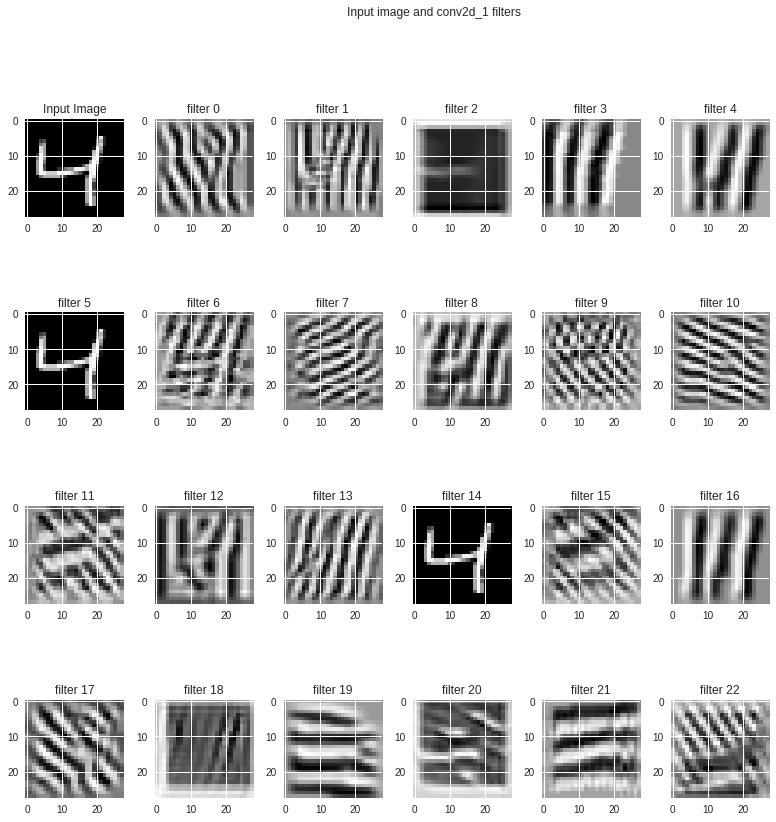

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
  # normalize tensor: center on 0., sensure std is 0.1
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  
  # clip to [0, 1]
  x += 0.5
  x = np.clip(x, 0, 1)
  
  # convert to RGB array
  x *= 255
  #x = x.transpose((1, 2, 0))
  x = np.clip(x, 0, 255).astype('uint8')
  return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_1'):
  layer_output = layer_dict[layer_name].output
  img_ascs = list()
  for filter_index in range(layer_output.shape[3]):
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # this function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # step size for gradient ascent
    step = 5.
    
    img_asc = np.array(img)
    # run gradient ascent for 20 steps
    for i in range(20):
      loss_value, grads_value = iterate([img_asc])
      img_asc += grads_value * step
      
    img_asc = img_asc[0]
    img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
    
  if layer_output.shape[3] >= 35:
    plot_x, plot_y = 6, 6
  elif layer_output.shape[3] >= 23:
    plot_x, plot_y = 4, 6
  elif layer_output.shape[3] >= 11:
    plot_x, plot_y = 2, 6
  else:
    plot_x, plot_y = 1, 2
  
  fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
  ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
  ax[0, 0].set_title('Input Image')
  fig.suptitle('Input image and %s filters' % (layer_name, ))
  fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
  for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
    if x == 0 and y == 0:
      continue
    ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
    ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))
    
vis_img_in_filter()

    
 